In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import files
uploaded = files.upload()
# get data

Saving loan approval.csv to loan approval.csv


In [26]:
df = pd. read_csv("/content/loan approval.csv")
df['Status'] = df['Status'].map({'Y': 1, 'N': 0})
# read and set new status

In [27]:
y = df['Status'] # set y for train
X = df.drop(columns=['Status','Gender','Married','Dependents','Education','Self_Employed','Coapplicant','Term(month)','loan_History','Area']) # drop status and unimportant information

X.head()
#show data

,Income(dollar),Loan_Amount
0,144200.0,3500000
1,183000.0,0
2,188000.0,6100000
3,195000.0,13500000
4,196300.0,5300000


In [28]:
scaler = StandardScaler() # ตั้งค่าสเกล
X_scaled = scaler.fit_transform(X)

In [15]:
y.describe()

,Status
count,614.000000
mean,0.687296
std,0.463973
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


<Axes: xlabel='Income(dollar)', ylabel='Loan_Amount'>

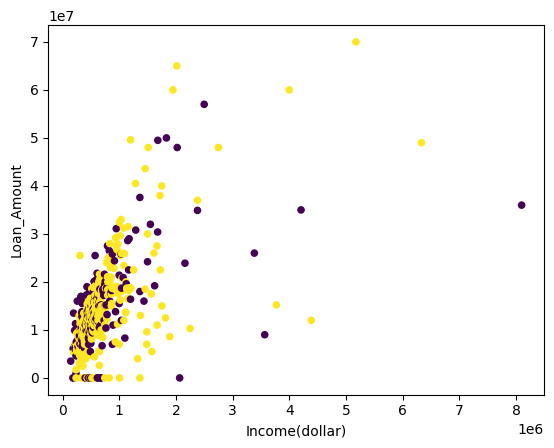

In [30]:
df.plot(kind='scatter', x='Income(dollar)', y='Loan_Amount', c=df['Status'], cmap=plt.cm.viridis, colorbar=False) # show graph

# Create KNN Classifier

In [31]:
knn = KNeighborsClassifier(n_neighbors = 15) # K = 1
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=15)

# Add new data point and make prediction

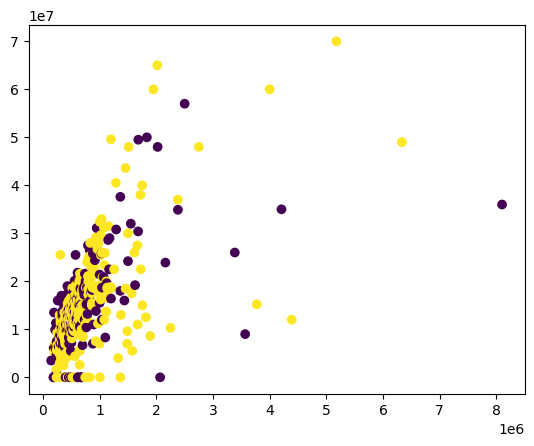

In [34]:
new_1 = 8
new_2 = 21
new_point = [(8, 21)]

plt.scatter(X['Income(dollar)']+ [new_1], X['Loan_Amount']+ [new_2], c=y+[2])
plt.show()

In [35]:
prediction = knn.predict(new_point)

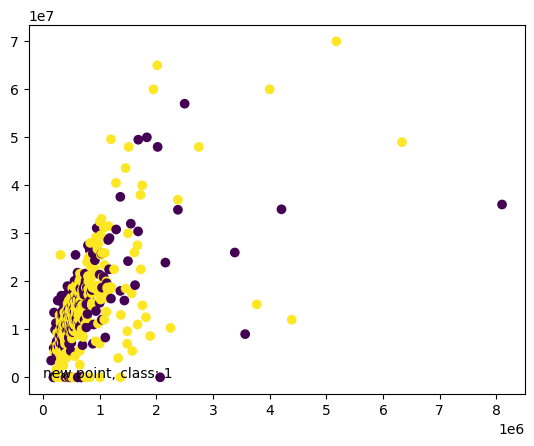

In [37]:
plt.scatter(X['Income(dollar)']+ [new_1], X['Loan_Amount']+ [new_2], c=y+[prediction[0]])

plt.text(x=new_1-1.7, y=new_2-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [38]:
import joblib

filename = 'knn_model.sav'
joblib.dump(knn, filename)

['knn_model.sav']